In [2]:
import os
os.chdir("/home/yangkai/codegen-detection/")

/tmp/ipykernel_2932803/3311013153.py:99: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgd.legendHandles:


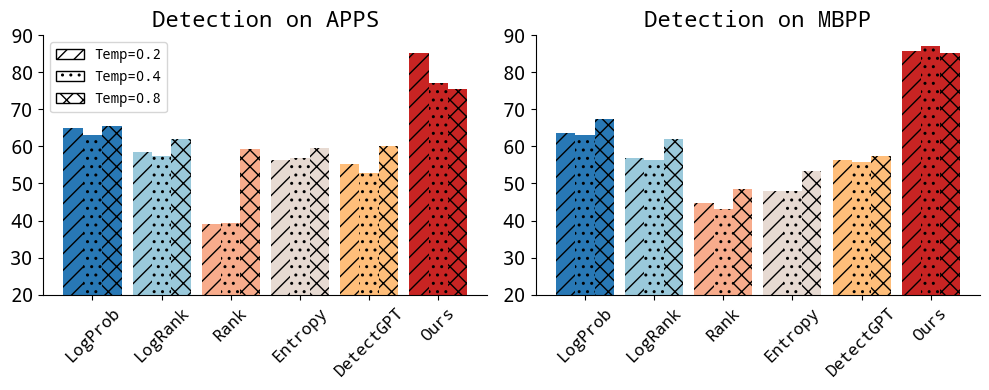

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rc('font', family='Noto Mono', weight='bold')
# Data extracted from the image provided by the user
data = {
    # 'CLlama': {
    #     'LogProb': [68.48, 64.58, 66.41],
    #     'LogRank': [63.31, 59.50, 61.27],
    #     'Rank': [54.08, 50.08, 58.25],
    #     'Entropy': [56.09, 53.02, 56.55],
    #     'Ours': [86.99, 89.21, 84.92]
    # },
    # 'StarChat': {
    #     'LogProb': [59.38, 63.25, 65.27],
    #     'LogRank': [54.03, 58.09, 60.56],
    #     'Rank': [42.81, 42.26, 57.56],
    #     'Entropy': [48.93, 52.99, 55.43],
    #     'Ours': [78.56, 82.24, 85.56]
    # },
    # GPT3.5 on APPS
    'Detection on APPS': {
        'LogProb': [65.05, 63.14, 65.54],
        'LogRank': [58.52, 57.36, 62.10],
        'Rank': [39.02, 39.26, 59.22],
        'Entropy': [56.24, 56.88, 59.60],
        'DetectGPT': [55.22,52.81,60.19],
        'Ours': [85.29, 77.11, 75.64]
    },
    # GPT3.5 on MBPP
    'Detection on MBPP': {
        'LogProb': [63.73,63.06,67.41],
        'LogRank': [56.88,56.31,62.12],
        'Rank': [44.61,42.98,48.53],
        'Entropy': [47.86,48.02,53.48],
        'DetectGPT': [56.24,55.88,57.29],
        'Ours': [85.78,87.17,85.32]
    }
}

# Temperatures to use for the x-axis
temperatures = [0.2, 0.4, 0.8]

methods = ["LogProb", "LogRank", "Rank", "Entropy",'DetectGPT',"Ours"]
fill_colors = ['#2878B5', '#9AC9DB', "#F8AC8C", '#E7DAD2', '#FFBE7A', '#C82423']
edge_colors = ['black'] * 6

# Plotting three subgraphs, one for each model
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=False)

# Function to plot each bar
def plot_bars(ax, model_data, title):
    # The x position of bars
    barWidth = 0.28
    r1 = np.arange(len(model_data))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Create bars
    bars1 = ax.bar(r1, [item[0] for item in model_data.values()], width=barWidth,color=fill_colors,label='Temp=0.2',hatch='//')
    bars2 = ax.bar(r2, [item[1] for item in model_data.values()], width=barWidth,color=fill_colors,label='Temp=0.4',hatch='..')
    bars3 = ax.bar(r3, [item[2] for item in model_data.values()], width=barWidth,color=fill_colors,label='Temp=0.8',hatch='xx')
    # ax.bar(r4, model_data['Entropy'], width=barWidth, edgecolor='grey', label='Entropy')
    # ax.bar(r5, model_data['Ours'], width=barWidth, edgecolor='grey', label='Ours')

    # Add xticks on the middle of the group bars
    # ax.set_xlabel('Methods', fontweight='bold',fontsize=16)
    ax.set_xticks([r + barWidth for r in range(len(r1))])
    ax.set_xticklabels(methods,fontsize=12,rotation=45)
    ax.set_title(title,fontsize=16)
    
    return bars1, bars2, bars3

# Plot each model's data in a separate subgraph
bar_objects = []
for i, (model_name, model_data) in enumerate(data.items()):
    bars = plot_bars(axes[i], model_data, model_name)
    bar_objects.extend(bars)  # Only need to keep one set of bars for the legend

# Add legends and make layout tight
for ax in axes:
    ax.set_ylim(20, 90)

# Adjust font size of y-axis ticks
plt.setp(axes, yticks=np.arange(20, 91, 10))
for ax in axes:
    for label in ax.get_yticklabels():
        label.set_fontsize(14)

for ax in axes:
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Add a single legend for the entire figure
lgd = axes[0].legend(handles=bar_objects[:3], labels=[f'Temp={temp}' for temp in temperatures], ncol=1, fontsize=10, loc='upper left')

for handle in lgd.legendHandles:
    handle.set_color('none')  # Set the color of the marker to none (transparent)
    handle.set_edgecolor('black')  # Keep the edge color to make the hatch visible
plt.tight_layout()

plt.savefig("visuals/vary_decode_temp.pdf",dpi=300,format='pdf')
# Show the plot
plt.show()
